### Gradient Boosting Machine (GBM) Algorithm

* GBM is an ensemble machine learning technique.

* It builds multiple weak models (commonly decision trees) one after another

* and each new model tries to correct the errors of the previous one.

* Can be used for both classification and regression

#### Working

- Initial Prediction:
    
    - GBM starts with a simple model, often predicting the mean of the target variable for all instances.


- Compute Residuals:
   
   - It calculates the residuals (errors) between the actual target values and the current predictions.

- Fit a Weak Learner:
    
    - A decision tree (usually shallow) is trained to predict these residuals — not the actual target values.




- Update the Model:
    
    - The predictions from the tree are scaled by a learning rate (e.g., 0.1) and added to the previous predictions.
    
    - This helps the model gradually improve and avoid overfitting.




- Repeat:

   - Steps 2–4 are repeated for a fixed number of iterations (or until convergence).
   
   - Each new tree focuses on correcting the mistakes of the previous ensemble.


Working- Classification

#### Weak Model:

* The weak learner is typically a Decision Tree, and more specifically:

    * Shallow Decision Trees (usually depth = 1 to 5)

    * Often called Decision Stumps when depth = 1.

##### Key idea:

* Build trees sequentially.

* Each tree learns the mistakes (residuals) of the previous tree.

* Combine all trees to make a strong model.

##### Pros:

* High accuracy

* Works well for tabular data

##### Cons:

* Slow training

* Can overfit if not tuned properly

#### GBM Parameters

1. n_estimators:

     * Number of boosting stages (trees)
        
     * Higher → better learning but may overfit

     * Default: 100
        
     * Typical range: 100–500

2. learning_rate:

     * Shrinks contribution of each tree

     * Small value means slower but better learning

     * Default: 0.1
     
     * Typical: 0.01 to 0.2
     
     * Tip: lower learning_rate → increase n_estimators

3. max_depth:

     * Depth of each decision tree
     
     * Controls complexity

     * Default: 3
     
     * Typical: 3–7

4. subsample:

    * % of data rows used for each tree
    
    * Helps prevent overfitting

    * Default: 1.0
    
    * Typical: 0.5 – 0.9

5. criterion:

    * Split quality measure
    
    * Options:

       * "friedman_mse" (default)

       * "squared_error"

6. min_samples_split

7. min_samples_leaf

8. max_features

9. random_state

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    subsample=0.8,
    max_features='sqrt'
)

### XGBoost (Extreme Gradient Boosting)

* XGBoost is an improved, optimized, and very fast version of GBM.

* used for both regression and classification.

* Parallel processing - Much faster training

* Handles missing values - No need to impute manually

* Tree pruning - Avoids unnecessary tree branches

* Built-in cross validation - Easy tuning

#### Why is it called “Boosting”?

* Because it builds models sequentially, where each new tree tries to fix the errors made by previous trees.

#### Tree Parameters

1. max_depth	                      - depth of tree (bigger → more complex)

2. subsample	                      - % of rows used

3. colsample_bytree	                  - % of features used

#### Boosting Parameters

1. learning_rate (eta)	- how fast model learns

2. n_estimators	        - number of trees

#### Disadvantages

* Training time slower than simple models

* Can overfit on small data if not tuned

* Not ideal for image, text → deep learning better there

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
)


PRACTICAL PROBLEM

REGRESSION PROBLEM - WINE QUALITY

In [ ]:
import pandas as pd
df=pd.read_csv("winequality-red.csv",sep=";")

In [ ]:
df.shape

(1599, 12)

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
df.duplicated().sum()

240

In [ ]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
df=df.drop(columns=['fixed acidity','free sulfur dioxide'],axis=1)

In [ ]:
df.columns

Index(['volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [ ]:
corr=df.corr()

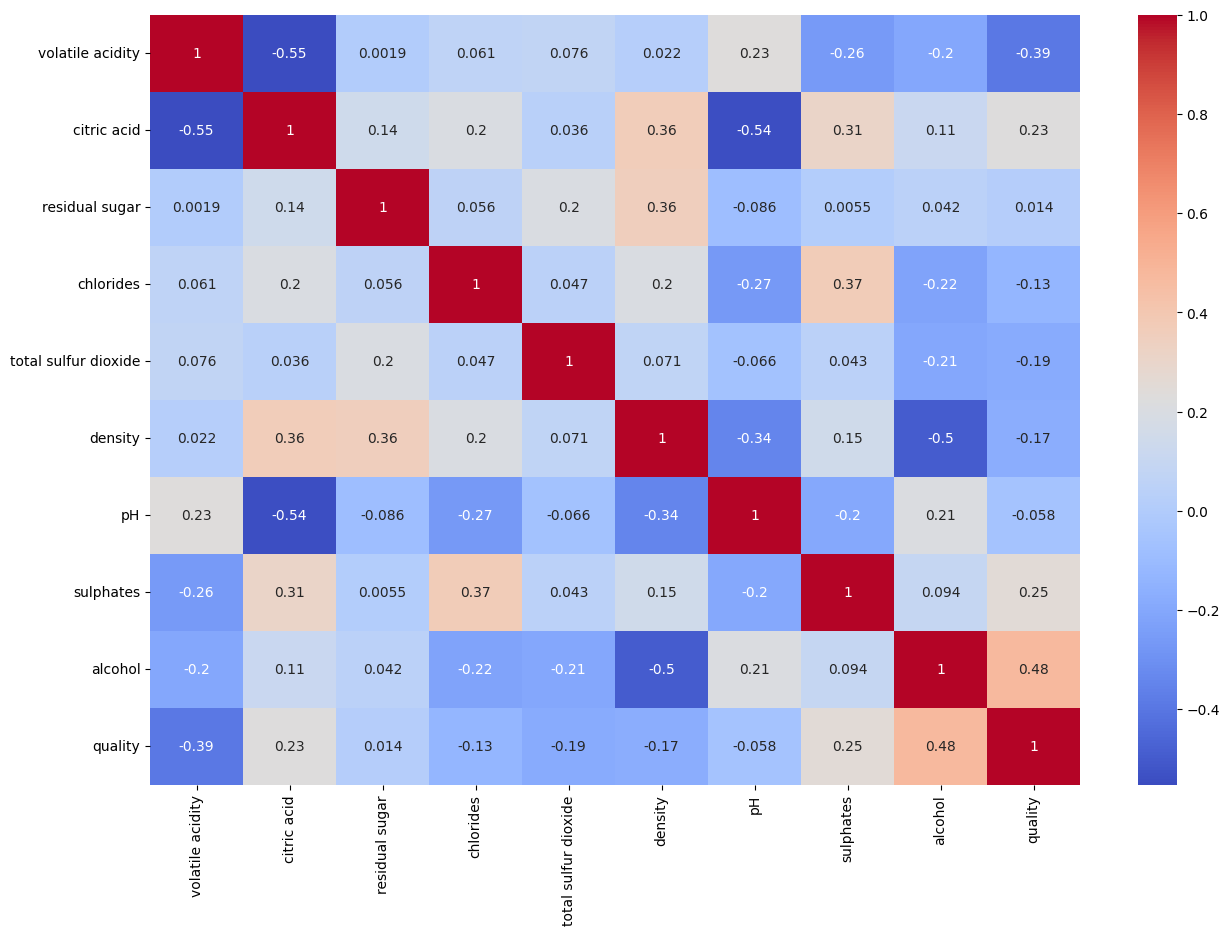

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
X= df.drop('quality',axis=1)
y=df['quality']

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
gbm_model=GradientBoostingRegressor(random_state=42)

In [ ]:
param_grid={
    'n_estimators':[5,10,15,20],
    'learning_rate':[0.01,0.02,0.1,0.15],
    'max_depth':[2,3,4,5,6],
    'subsample':[0.6,0.7,0.8]
}

In [ ]:
random_model=RandomizedSearchCV(gbm_model,param_grid,cv=3,scoring='neg_mean_squared_error',n_iter=50,verbose=3)

In [ ]:
random_model.fit(xtrain,ytrain)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV 1/3] END learning_rate=0.15, max_depth=2, n_estimators=5, subsample=0.8;, score=-0.528 total time=   0.0s
[CV 2/3] END learning_rate=0.15, max_depth=2, n_estimators=5, subsample=0.8;, score=-0.520 total time=   0.0s
[CV 3/3] END learning_rate=0.15, max_depth=2, n_estimators=5, subsample=0.8;, score=-0.467 total time=   0.0s
[CV 1/3] END learning_rate=0.01, max_depth=4, n_estimators=10, subsample=0.6;, score=-0.623 total time=   0.0s
[CV 2/3] END learning_rate=0.01, max_depth=4, n_estimators=10, subsample=0.6;, score=-0.627 total time=   0.0s
[CV 3/3] END learning_rate=0.01, max_depth=4, n_estimators=10, subsample=0.6;, score=-0.583 total time=   0.0s
[CV 1/3] END learning_rate=0.1, max_depth=5, n_estimators=5, subsample=0.8;, score=-0.513 total time=   0.0s
[CV 2/3] END learning_rate=0.1, max_depth=5, n_estimators=5, subsample=0.8;, score=-0.524 total time=   0.0s
[CV 3/3] END learning_rate=0.1, max_depth=5, n_estimators

,estimator,GradientBoost...ndom_state=42)
,param_distributions,"{'learning_rate': [0.01, 0.02, ...], 'max_depth': [2, 3, ...], 'n_estimators': [5, 10, ...], 'subsample': [0.6, 0.7, ...]}"
,n_iter,50
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,3
,verbose,3
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [ ]:
random_pred=random_model.predict(xtest)

In [ ]:
mae=mean_absolute_error(ytest,random_pred)
mse=mean_squared_error(ytest,random_pred)
r2=r2_score(ytest,random_pred)
print("MAE:",mae)
print("MSE:",mse)
print("R2 Score:",r2)

MAE: 0.47566954749798984
MSE: 0.35091508799350735
R2 Score: 0.46302686814604


In [ ]:
print("BEST PARAMETERS:",random_model.best_params_)
print("BEST SCORE",random_model.best_score_)

BEST PARAMETERS: {'subsample': 0.7, 'n_estimators': 20, 'max_depth': 6, 'learning_rate': 0.1}
BEST SCORE -0.4032074742089353


In [ ]:
best_model=random_model.best_estimator_
pred=best_model.predict(xtest)

In [ ]:
mae=mean_absolute_error(ytest,pred)
mse=mean_squared_error(ytest,pred)
r2=r2_score(ytest,pred)
print("MAE:",mae)
print("MSE:",mse)
print("R2 Score:",r2)

MAE: 0.47566954749798984
MSE: 0.35091508799350735
R2 Score: 0.46302686814604


XGBOOST REGReSSOR

In [ ]:
from xgboost import XGBRegressor

xgb_model=XGBRegressor(random_state=42)

In [ ]:
param_grid={
    'n_estimators':[5,10,15,20],
    'learning_rate':[0.01,0.02,0.1,0.15],
    'max_depth':[2,3,4,5,6],
    'subsample':[0.6,0.7,0.8],
    'colsample_bytree':[0.6,0.7,0.8,0.9]
}

In [ ]:
random_xgbmodel=RandomizedSearchCV(xgb_model,param_grid,cv=3,scoring='neg_mean_squared_error',n_iter=50,verbose=3)

In [ ]:
random_xgbmodel.fit(xtrain,ytrain)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV 1/3] END colsample_bytree=0.7, learning_rate=0.15, max_depth=6, n_estimators=15, subsample=0.8;, score=-0.420 total time=   0.0s
[CV 2/3] END colsample_bytree=0.7, learning_rate=0.15, max_depth=6, n_estimators=15, subsample=0.8;, score=-0.430 total time=   0.0s
[CV 3/3] END colsample_bytree=0.7, learning_rate=0.15, max_depth=6, n_estimators=15, subsample=0.8;, score=-0.379 total time=   0.0s
[CV 1/3] END colsample_bytree=0.9, learning_rate=0.01, max_depth=2, n_estimators=20, subsample=0.6;, score=-0.611 total time=   0.0s
[CV 2/3] END colsample_bytree=0.9, learning_rate=0.01, max_depth=2, n_estimators=20, subsample=0.6;, score=-0.614 total time=   0.0s
[CV 3/3] END colsample_bytree=0.9, learning_rate=0.01, max_depth=2, n_estimators=20, subsample=0.6;, score=-0.564 total time=   0.0s
[CV 1/3] END colsample_bytree=0.6, learning_rate=0.15, max_depth=6, n_estimators=5, subsample=0.8;, score=-0.503 total time=   0.0s
[CV 2/3]

,estimator,"XGBRegressor(...ree=None, ...)"
,param_distributions,"{'colsample_bytree': [0.6, 0.7, ...], 'learning_rate': [0.01, 0.02, ...], 'max_depth': [2, 3, ...], 'n_estimators': [5, 10, ...], ...}"
,n_iter,50
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,3
,verbose,3
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [ ]:
print("best parameters:",random_xgbmodel.best_params_)
print("Best Score:",random_xgbmodel.best_score_)


best parameters: {'subsample': 0.8, 'n_estimators': 15, 'max_depth': 6, 'learning_rate': 0.15, 'colsample_bytree': 0.7}
Best Score: -0.40954293807347614


In [ ]:
best_model=random_xgbmodel.best_estimator_

In [ ]:
pred=best_model.predict(xtest)

In [ ]:
mae=mean_absolute_error(ytest,pred)
mse=mean_squared_error(ytest,pred)
r2=r2_score(ytest,pred)
print("MAE:",mae)
print("MSE:",mse)
print("R2 Score:",r2)

MAE: 0.48273760080337524
MSE: 0.36124590039253235
R2 Score: 0.44721853733062744
